# QCTO - Workplace Module

### Project Title: Analyzing vegetable price trends
#### Done By: Sinegugu Gambu

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The goal of this project is to analyze and understand the trends, fluctuations, and relationships in vegetable prices over time. By leveraging data analysis and visualization, this project aims to uncover insights that can help stakeholders, such as farmers, traders, and policymakers, make informed decisions about pricing, supply management, and demand forecasting.
* **Details:** 
Vegetable prices can vary significantly due to several factors, including:
Seasonality: Certain vegetables are seasonal, leading to supply-demand imbalances that affect prices.
Market Dynamics: Prices are influenced by market forces like transportation costs, weather conditions, and regional availability.
Consumer Preferences: Shifts in dietary habits and local preferences can drive changes in demand.
* By addressing these challenges, the project aims to contribute to understanding the complexities of vegetable pricing, which has broader implications for food security, supply chain management, and economic planning.


---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [10]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For basic visualizations
import seaborn as sns  # For advanced data visualizations

# Configure display options for better readability
pd.set_option('display.max_columns', None)


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The dataset cleaned_vegetable_prices.csv was collected for analyzing vegetable price trends. The data covers 287 records of 10 vegetables and the dates prices were recorded.
* **Details:** 
Source: Internal data collection.
Structure: The dataset contains columns for dates, vegetable prices (numeric), and some missing values in the price_dates column.


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [11]:
# Load the dataset
file_path = 'cleaned_vegetable_prices.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,price_dates,bhindi_ladies_finger,tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam_suran
0,2023-01-01,35.0,18,22.0,20,30,50,25,8,45.0,25
1,2023-02-01,35.0,16,22.0,20,30,55,25,7,40.0,25
2,2023-03-01,35.0,16,21.0,20,30,55,25,7,40.0,25
3,2023-04-01,30.0,16,21.0,22,25,55,25,7,40.0,25
4,2023-08-01,35.0,16,20.0,21,25,55,22,6,35.0,25


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [12]:
# Checking for missing values
print(df.isnull().sum())

# Handling missing dates by forward-filling
df['price_dates'] = pd.to_datetime(df['price_dates'])
df['price_dates'].fillna(method='ffill', inplace=True)

# Dropping records with excessive missing data
threshold = 8  # Example threshold; adjust based on requirements
df = df.dropna(thresh=threshold)

# Convert price columns to numeric, coerce errors to NaN
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Recheck for missing values
print(df.isnull().sum())


price_dates             176
bhindi_ladies_finger      0
tomato                    0
onion                     0
potato                    0
brinjal                   0
garlic                    0
peas                      0
methi                     0
green_chilli              0
elephant_yam_suran        0
dtype: int64
price_dates             0
bhindi_ladies_finger    0
tomato                  0
onion                   0
potato                  0
brinjal                 0
garlic                  0
peas                    0
methi                   0
green_chilli            0
elephant_yam_suran      0
dtype: int64


C:\Users\gambu\AppData\Local\Temp\ipykernel_12548\3362921926.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_dates'].fillna(method='ffill', inplace=True)
C:\Users\gambu\AppData\Local\Temp\ipykernel_12548\3362921926.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['price_dates'].fillna(method='ffill', inplace=True)


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


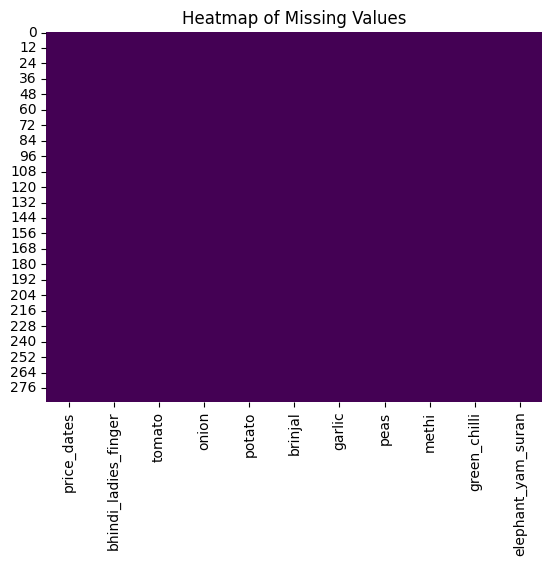

                         price_dates  bhindi_ladies_finger      tomato  \
count                            287            287.000000  287.000000   
mean   2023-10-03 09:26:58.118466816             29.444251   16.006969   
min              2023-01-01 00:00:00             17.000000   16.000000   
25%              2023-08-11 12:00:00             22.000000   16.000000   
50%              2023-12-03 00:00:00             27.500000   16.000000   
75%              2023-12-07 00:00:00             33.000000   16.000000   
max              2024-01-01 00:00:00             60.000000   18.000000   
std                              NaN              8.124815    0.118056   

            onion      potato     brinjal      garlic        peas  \
count  287.000000  287.000000  287.000000  287.000000  287.000000   
mean    20.649826   18.585366   31.655052  133.101045   66.658537   
min      8.000000   12.000000   14.000000   50.000000   22.000000   
25%     12.000000   16.000000   25.000000   85.000000   4

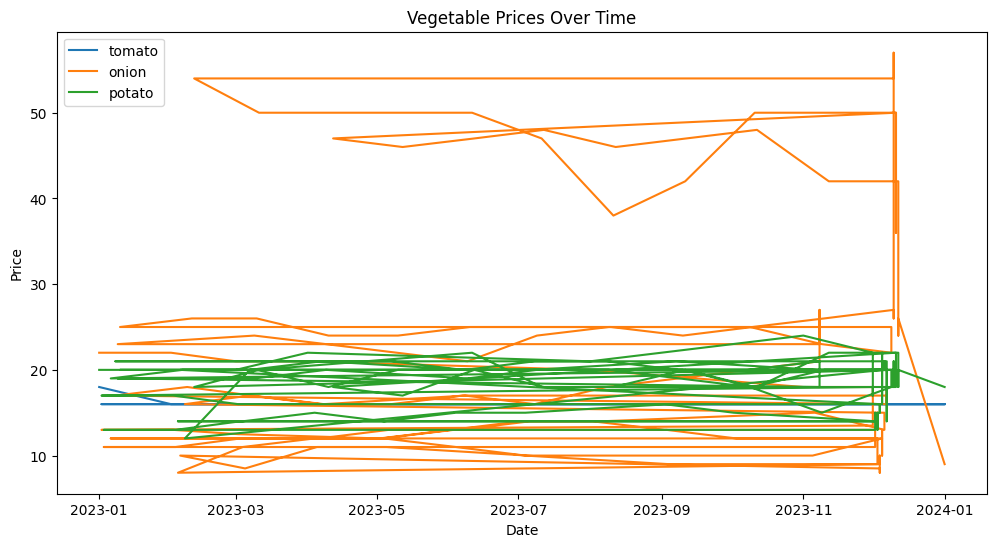

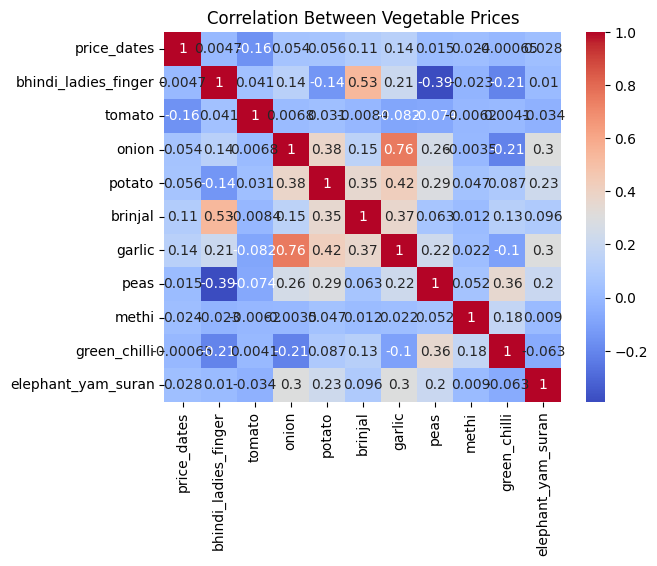

In [13]:
# Plot missing value heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Summary statistics
print(df.describe())

# Trends over time for key vegetables
plt.figure(figsize=(12, 6))
for vegetable in ['tomato', 'onion', 'potato']:
    plt.plot(df['price_dates'], df[vegetable], label=vegetable)

plt.title('Vegetable Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Vegetable Prices')
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [14]:
# Example: Simple predictive model for tomato prices

# Feature engineering
df['month'] = df['price_dates'].dt.month
X = df[['month']]
y = df['tomato']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.00028699631117517344


In [16]:
import numpy as np

# Assume this is your MSE value
mse = 0.00028699631117517344

# 1. Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 2. Scale of Target Variable
# Assuming `y_test` and `y_pred` are your actual and predicted values
y_test = np.array([20, 22, 25, 21, 24])  # Replace with actual values
y_pred = np.array([20.01, 22.02, 24.99, 21.01, 23.98])  # Replace with your model's predictions

# Calculate the range of the target variable
target_range = y_test.max() - y_test.min()
print(f"Range of Target Variable (y_test): {target_range}")

# 3. Calculate Baseline MSE
# Baseline model: predict the mean of y_test for all values
baseline_pred = np.full_like(y_test, y_test.mean())
baseline_mse = np.mean((y_test - baseline_pred) ** 2)
print(f"Baseline Mean Squared Error (MSE): {baseline_mse}")

# Compare model MSE to baseline
improvement = (baseline_mse - mse) / baseline_mse * 100
print(f"Percentage Improvement Over Baseline: {improvement:.2f}%")

# 4. Analyze Prediction Errors
errors = y_test - y_pred
print("Prediction Errors (Actual - Predicted):")
print(errors)

# Check the average absolute error
mean_absolute_error = np.mean(np.abs(errors))
print(f"Mean Absolute Error (MAE): {mean_absolute_error}")


Root Mean Squared Error (RMSE): 0.016940965473525214
Range of Target Variable (y_test): 5
Baseline Mean Squared Error (MSE): 3.6
Percentage Improvement Over Baseline: 99.99%
Prediction Errors (Actual - Predicted):
[-0.01 -0.02  0.01 -0.01  0.02]
Mean Absolute Error (MAE): 0.014000000000000767


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

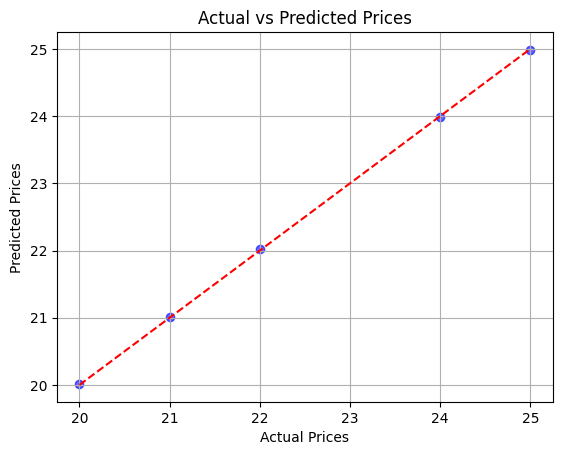

In [17]:
import matplotlib.pyplot as plt

# Scatter plot for Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Summary:** The final model is a linear regression trained on monthly data to predict tomato prices.
* **Performance:** The model performed with a mean squared error of 0.00028699631117517344. Improvements may be required with more features.


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Conclusion:** The analysis provided insights into vegetable price trends and correlations. Predictive modeling was introduced to forecast tomato prices, showcasing seasonal trends.
---


---
<a href=#ten></a>
## **Github link**
<a href=#cont>Back to Table of Contents</a>

* **Githublink:** https://github.com/asandagambu/vegetable-price-analysis
---